In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# New Section

In [2]:
md = pd.read_csv('/content/drive/MyDrive/dataFinal.csv', sep='\t')

In [3]:
#md.shape()

In [4]:
data = md.copy()

In [5]:
#removing last columns which are of no use
data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)

In [6]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [7]:
data.shape

(1015341, 51)

In [8]:
data.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06
mean,2.648067e+00,2.773115e+00,3.288349e+00,3.140595e+00,3.276960e+00,2.401100e+00,2.771744e+00,3.414818e+00,2.963740e+00,3.556469e+00,3.285969e+00,3.165072e+00,3.846466e+00,2.663756e+00,2.843086e+00,2.841154e+00,3.050394e+00,2.683485e+00,3.088511e+00,2.773504e+00,2.255316e+00,3.831103e+00,2.259957e+00,3.927497e+00,2.270857e+00,3.743075e+00,2.195806e+00,3.689389e+00,3.789116e+00,3.592351e+00,3.297999e+00,2.930295e+00,3.975280e+00,2.617866e+00,2.625832e+00,2.831821e+00,3.698187e+00,2.465306e+00,3.200695e+00,3.590596e+00,3.654636e+00,2.075933e+00,4.000068e+00,1.999891e+00,3.792905e+00,1.894605e+00,3.976375e+00,3.182453e+00,4.122993e+00,3.958441e+00
std,1.264407e+00,1.323943e+00,1.215006e+00,1.237442e+00,1.277593e+00,1.225721e+00,1.400336e+00,1.271915e+00,1.346040e+00,1.305232e+00,1.345600e+00,1.228272e+00,1.163348e+00,1.252999e+00,1.273892e+00,1.326569e+00,1.293009e+00,1.343042e+00,1.297141e+00,1.323155e+00,1.339971e+00,1.140587e+00,1.277323e+00,1.127688e+00,1.171207e+00,1.222431e+00,1.120320e+00,1.095536e+00,1.166743e+00,1.080791e+00,1.176791e+00,1.390062e+00,1.044728e+00,1.251815e+00,1.274595e+00,1.416194e+00,1.128066e+00,1.140957e+00,1.276230e+00,1.053185e+00,1.157155e+00,1.112600e+00,1.097169e+00,1.090239e+00,9.923859e-01,1.104125e+00,1.008505e+00,1.255374e+00,1.041216e+00,1.034491e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,4.000000e+00,3.000000e+00
50%,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00

In [9]:
#checking the missing values
#print(data.isnull().values.sum())

In [10]:
#dopping the missing values;
#data.dropna(inplace=True)

In [11]:
print(data.isnull().values.sum())

89227


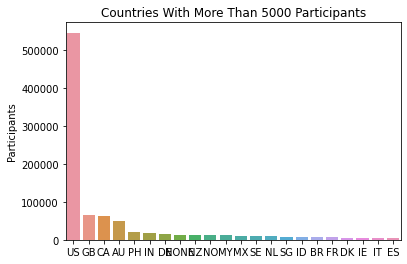

In [12]:
countries = pd.DataFrame(data['country'].value_counts())        #gets the total number of participants from countries in numbers
countries_5000 = countries[countries['country'] >= 5000]
sns.barplot(data=countries_5000, x=countries_5000.index, y='country')
plt.title('Countries With More Than 5000 Participants')
plt.ylabel('Participants');

In [13]:
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Group Names and Columns
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

In [14]:
# Function to visualize the all questions and answers
def questionAnswers(groupName, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)             
        plt.hist(data[groupName[i-1]], bins=10, color= color) 
        plt.title(questions[groupName[i-1]], fontsize=18)

Extroversion Personality


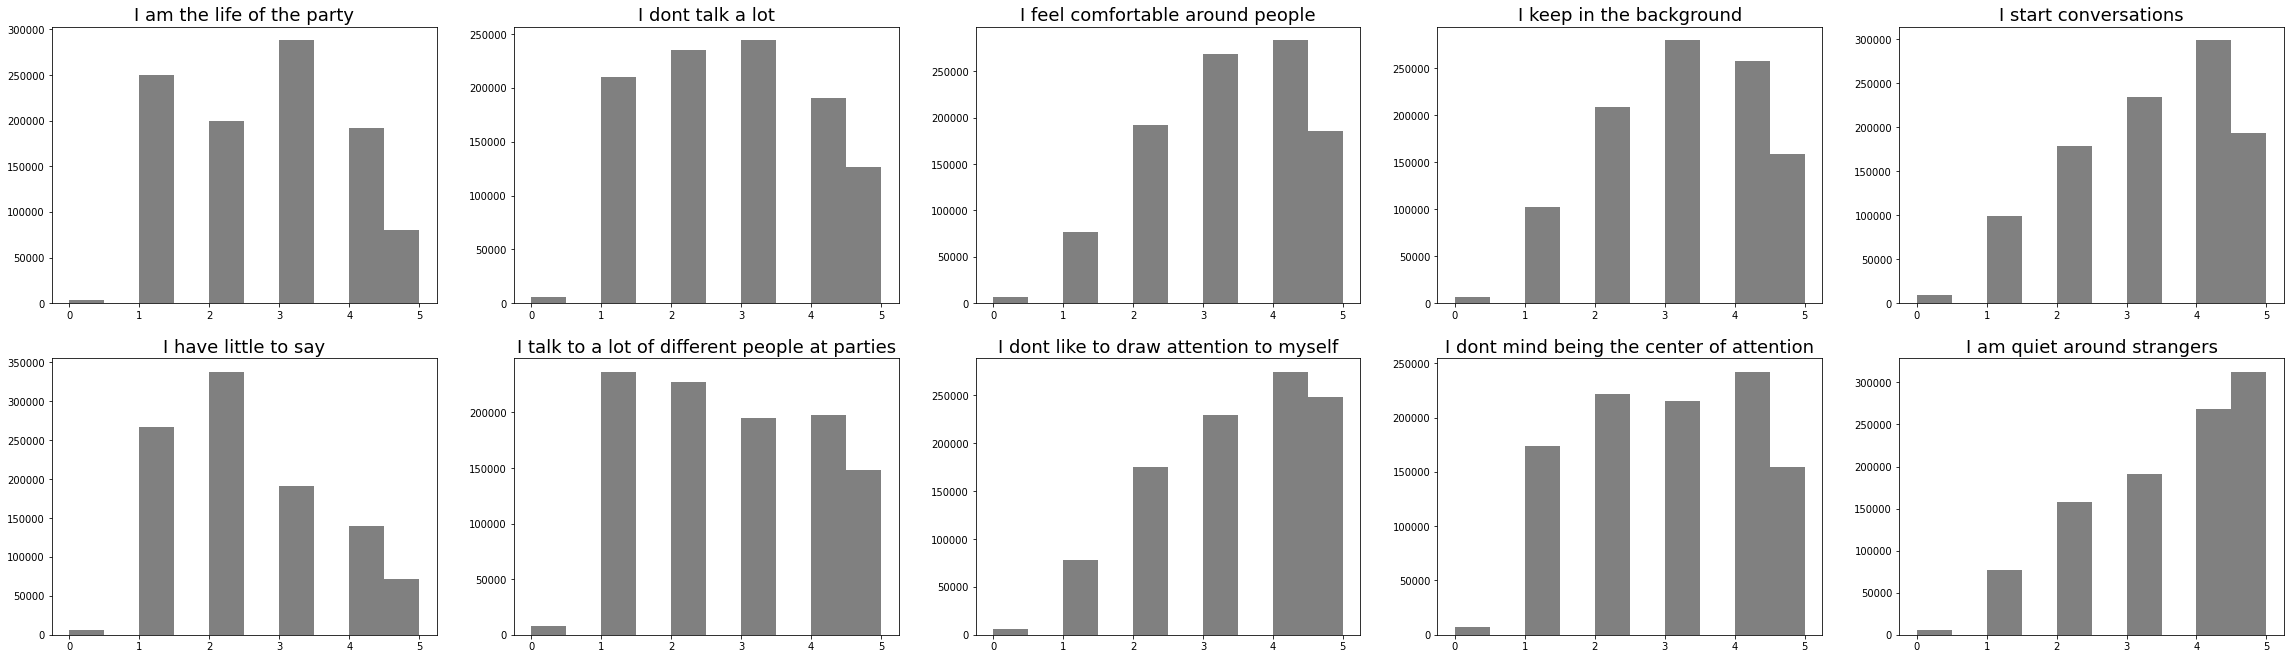

In [15]:
print('Extroversion Personality')
questionAnswers(EXT, ext_questions, 'grey')

Neuroticism Personality


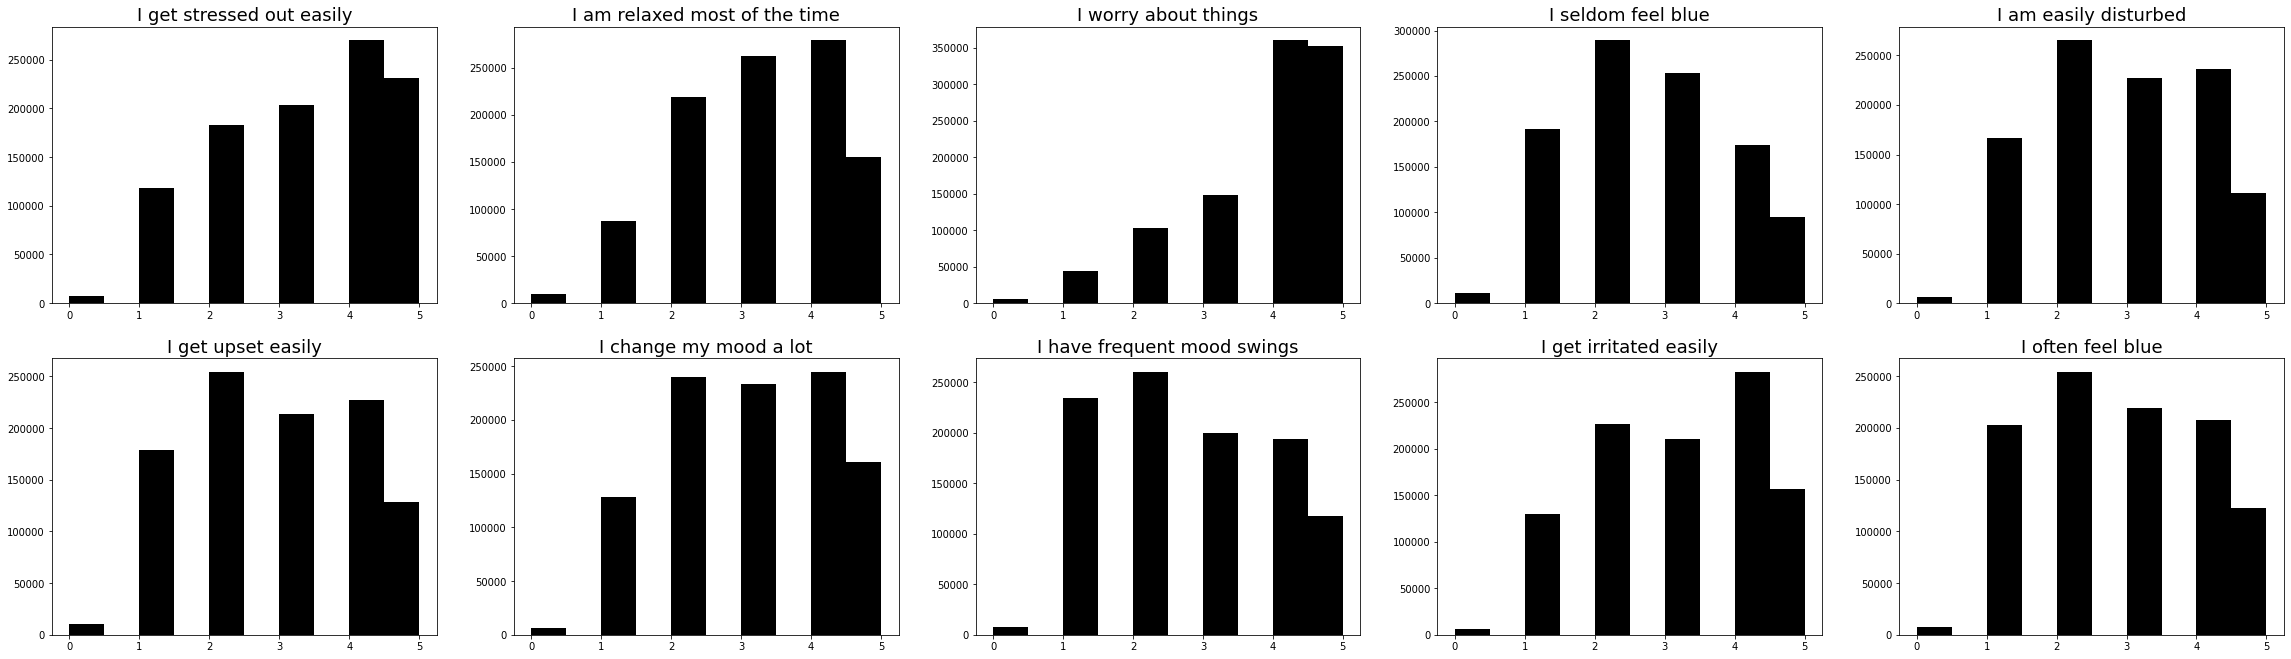

In [16]:
print('Neuroticism Personality')
questionAnswers(EST, est_questions, 'black')

Agreeable Personality


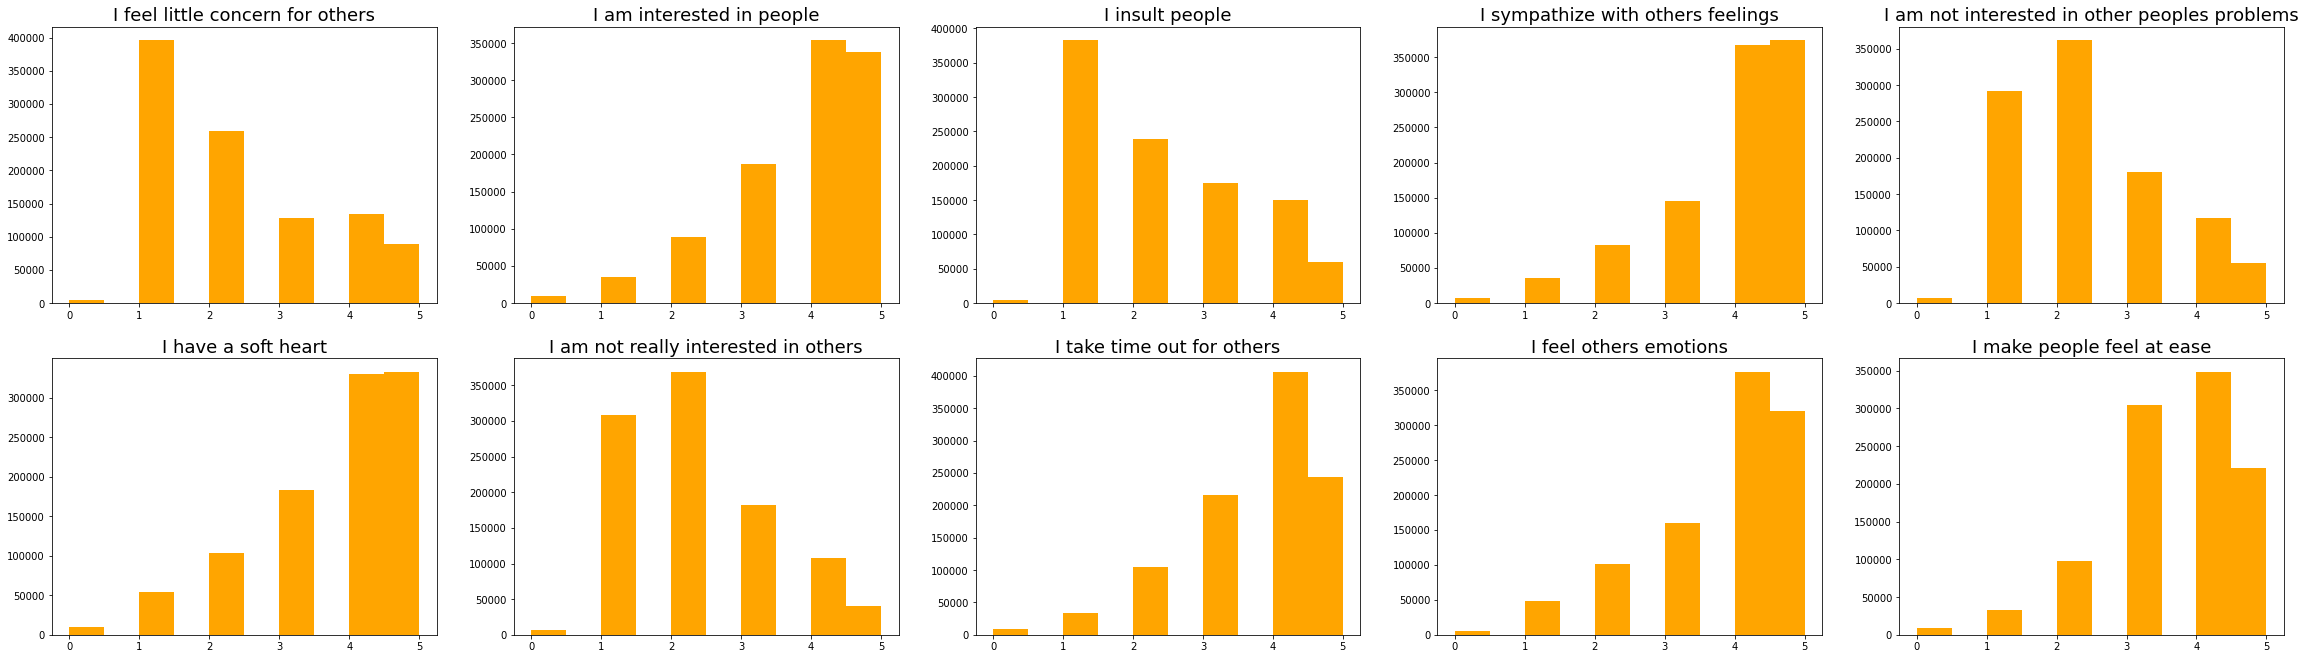

In [17]:
print('Agreeable Personality')
questionAnswers(AGR, agr_questions, 'orange')

Conscientious Personality


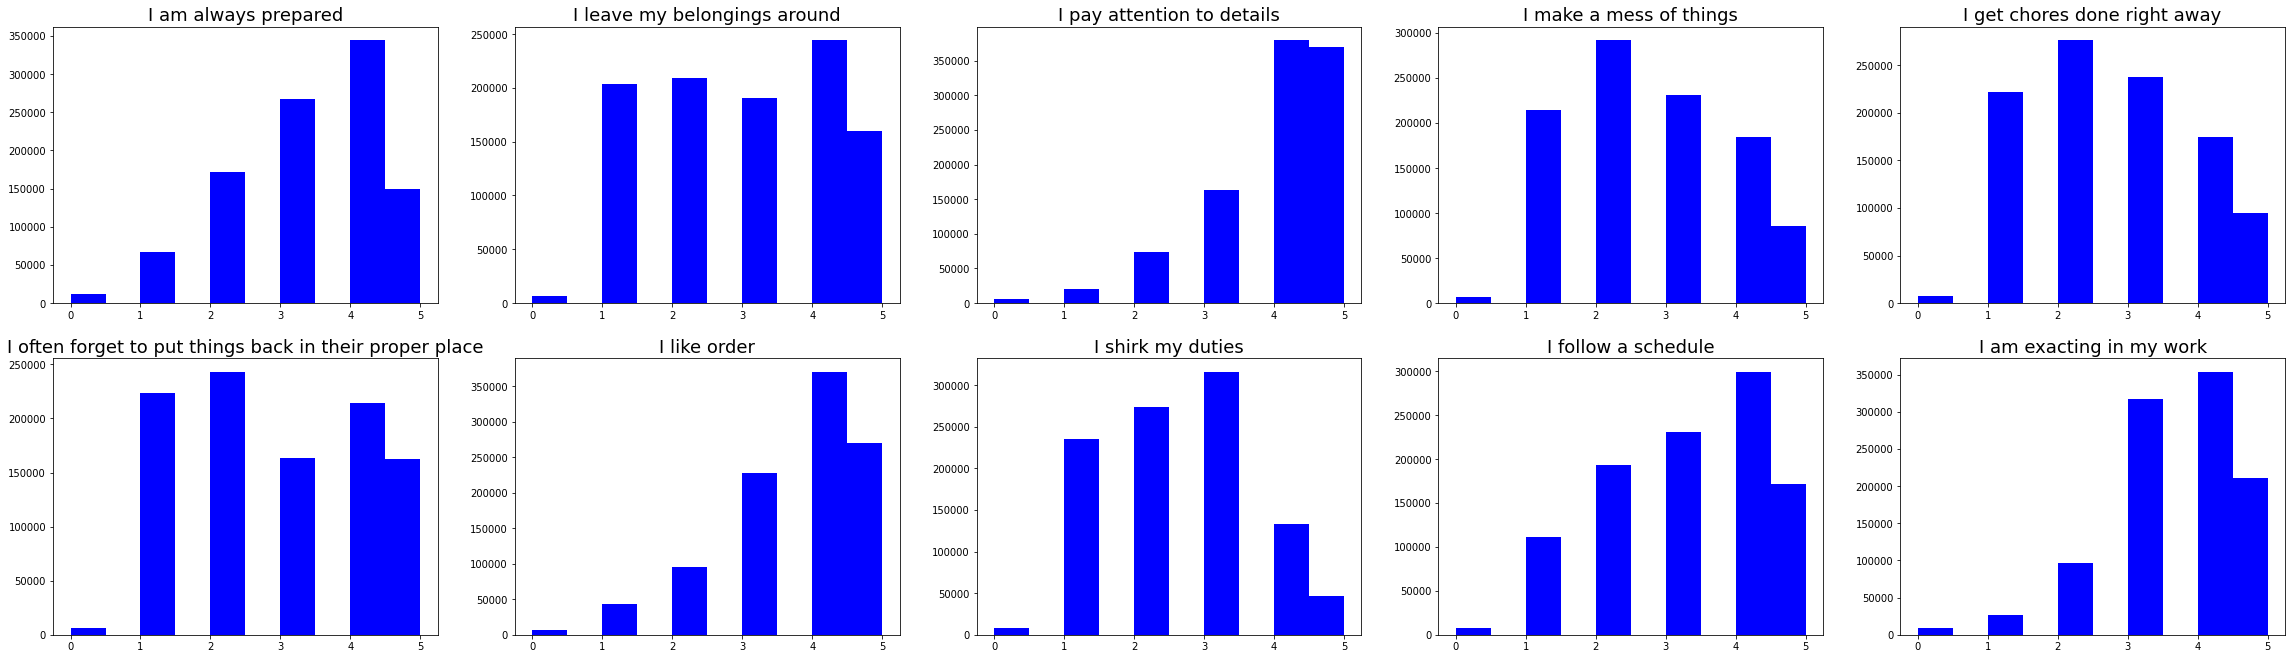

In [18]:
print('Conscientious Personality')
questionAnswers(CSN, csn_questions, 'blue')

Openness Personality


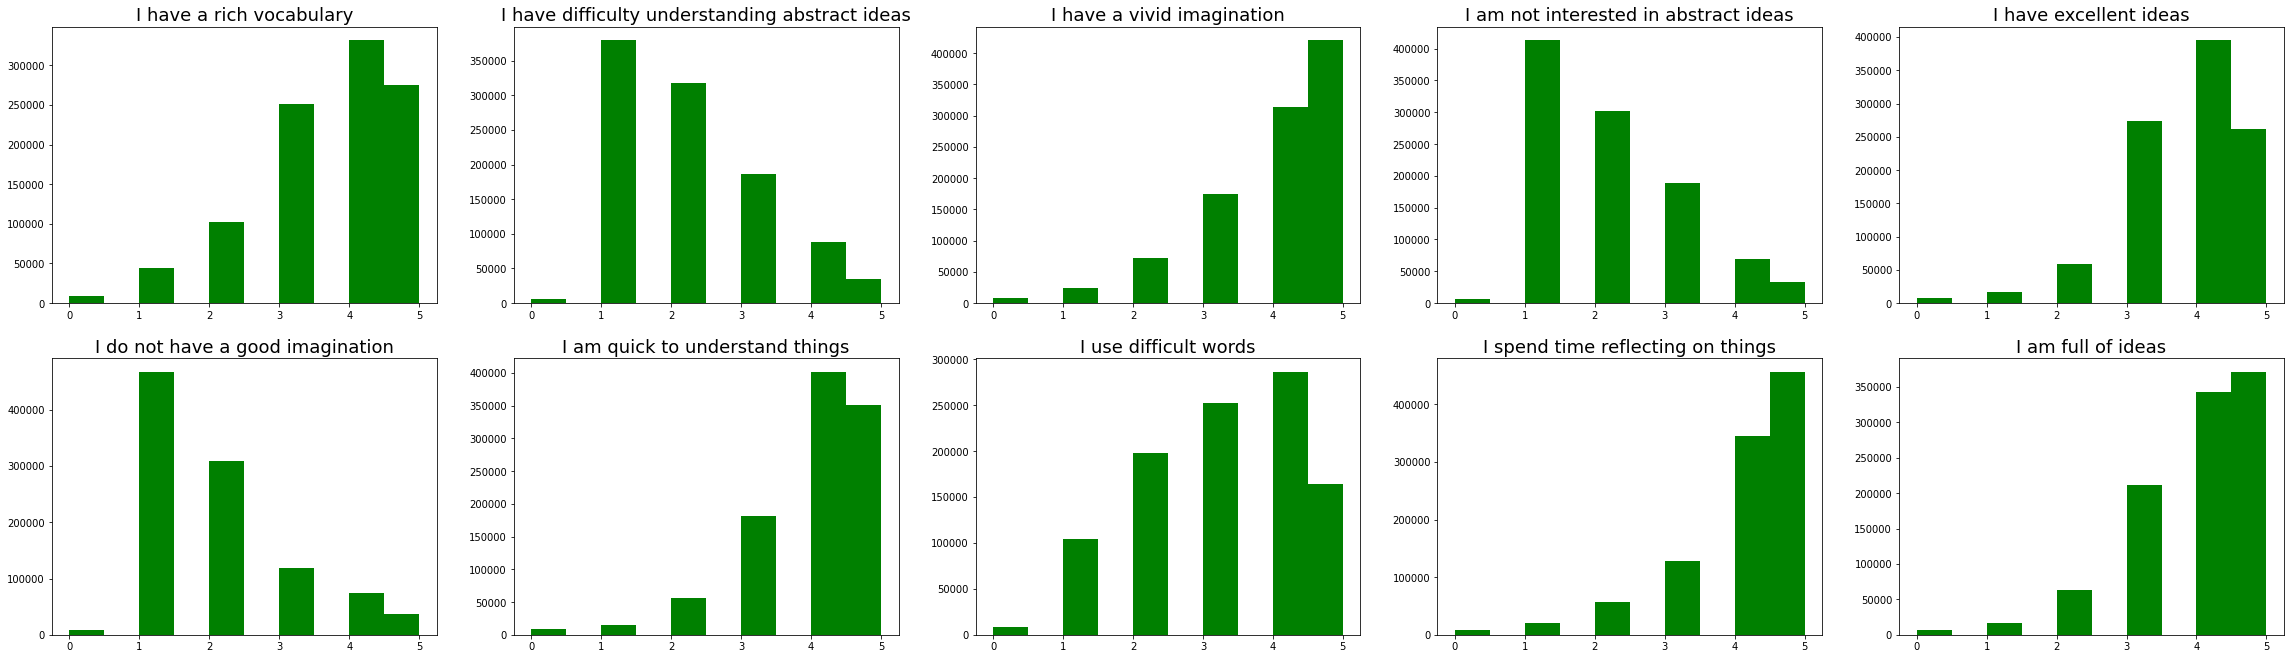

In [19]:
print('Openness Personality')
questionAnswers(OPN, opn_questions, 'green')

#**Clustering:**

# New Section

In [92]:
#k-Means clustering
from sklearn.cluster import KMeans

new_data = data.drop('country', axis=1);

kmeans = KMeans(n_clusters=5);
new_data.dropna(inplace=True)
k_fit = kmeans.fit(new_data);               #Data to be clustered

In [93]:
pd.options.display.max_columns = 50;
predictions = k_fit.labels_
new_data['Clusters'] = predictions;
new_data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,...,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,...,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,4
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,...,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,2
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,...,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,2
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,...,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,...,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,4


In [94]:
x = new_data.iloc[:, 0:50] 
print(x) 
y = new_data.iloc[:, 50:51]  
print(y)

         EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  \
0         4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0   1.0   
1         3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0   2.0   
2         2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0   4.0   
3         2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0   3.0   
4         3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0   1.0   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   ...   
1015336   4.0   2.0   4.0   3.0   4.0   3.0   3.0   3.0   3.0    3.0   4.0   
1015337   4.0   3.0   4.0   3.0   3.0   3.0   4.0   4.0   3.0    3.0   4.0   
1015338   4.0   2.0   4.0   3.0   5.0   1.0   4.0   2.0   4.0    4.0   3.0   
1015339   2.0   4.0   3.0   4.0   2.0   2.0   1.0   4.0   2.0    4.0   4.0   
1015340   4.0   2.0   4.0   2.0   4.0   1.0   4.0   2.0   4.0    4.0   4.0   

         EST2  EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10 

In [95]:
# Import train_test_split function
from sklearn.model_selection import train_test_split



# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1,)

In [96]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [97]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.897351908125814


In [98]:
print(y_pred)

[3 2 1 ... 3 4 0]


In [99]:
new_data.Clusters.value_counts()

0    226838
2    212821
4    209636
1    200512
3    163751
Name: Clusters, dtype: int64

In [100]:
pd.options.display.max_columns=50
new_data.groupby('Clusters').mean()


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.453540,1.912479,3.795669,2.502187,4.043458,1.830333,3.656076,2.766168,3.765859,2.997090,3.805513,2.931202,4.239369,2.415543,3.282620,3.460681,3.801149,3.450057,3.651791,3.167040,2.160260,4.272450,2.654811,4.181116,2.002063,3.995508,1.857352,3.896486,4.129194,3.845498,2.958596,3.602809,3.840988,3.232148,2.237813,3.519419,3.459090,2.825796,2.947804,3.479695,3.738606,2.116854,4.245845,1.966972,3.957714,1.771917,3.963013,3.374033,4.187663,4.200994
1,1.813268,3.621504,2.235253,4.051194,2.289130,3.188837,1.748105,4.064844,2.181336,4.471493,4.251576,2.458297,4.505137,2.145503,3.560046,3.862347,3.992803,3.763865,4.007650,3.932722,2.495317,3.336992,2.603949,3.810046,2.580559,3.827656,2.736759,3.412270,3.651417,3.049608,2.804466,3.359091,3.812580,3.479074,2.091401,3.503416,3.559313,3.045369,2.777165,3.308121,3.501506,2.381927,4.064959,2.136286,3.434657,2.085815,3.678393,3.179421,4.277270,3.724760
2,2.122591,3.308048,3.091777,3.664648,2.955164,2.710052,2.203392,4.002594,2.324460,4.135654,3.498236,3.083911,4.149637,2.609855,2.818411,2.784053,2.865112,2.426260,2.969270,2.706382,1.887633,3.934781,1.691783,4.350412,1.989470,4.142274,2.018372,3.980072,4.171830,3.718200,3.833094,2.233304,4.296493,2.022221,3.235414,2.079781,4.162202,2.018734,3.828461,3.889470,3.574243,2.137491,3.893432,2.063330,3.727066,1.967489,4.009421,2.984795,4.264081,3.813782
3,2.186356,3.289623,2.787800,3.405994,2.581554,2.764673,2.115786,3.526244,2.646817,3.789107,2.346563,3.617499,2.991170,2.916935,2.324639,2.016214,2.305763,1.926541,2.586598,2.249525,3.033252,2.923286,2.581890,2.763061,3.157660,2.640057,3.009179,2.842486,2.593474,2.972422,3.139364,2.833644,3.664521,2.413286,2.365042,2.744918,3.374721,2.517340,2.765357,3.336199,3.535563,1.977374,3.614427,2.058387,3.621431,2.043291,3.883524,3.111535,3.696332,3.665944
4,3.469075,1.946393,4.337208,2.221098,4.262283,1.667610,3.883302,2.811216,3.740698,2.516848,2.318509,3.823141,3.151629,3.284989,2.111751,1.896387,2.106384,1.673052,2.112982,1.716342,1.894226,4.430007,1.829023,4.245631,1.858445,3.845356,1.589412,4.096792,4.098251,4.194032,3.717992,2.575540,4.192858,1.893950,3.141727,2.276785,3.871334,1.933132,3.582181,3.876076,3.884867,1.753473,4.081546,1.794959,4.158007,1.654339,4.314827,3.234111,4.095499,4.294830


**Checking the pattern after grouping**

In [101]:
list_of_col = list(new_data)
ext = list_of_col[0:10]
est = list_of_col[10:20]
agr = list_of_col[20:30]
csn = list_of_col[30:40]
opn = list_of_col[40:50]

sum_data = pd.DataFrame()
sum_data['extroversion'] = new_data[ext].sum(axis=1)/10
sum_data['neurotic'] = new_data[est].sum(axis=1)/10
sum_data['agreeable'] = new_data[agr].sum(axis=1)/10
sum_data['conscientious'] = new_data[csn].sum(axis=1)/10
sum_data['open'] = new_data[opn].sum(axis=1)/10
sum_data['clusters'] = predictions
sum_data.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.072286,3.420497,3.299474,3.210416,3.352361
1,2.966496,3.647995,3.150457,3.174000,3.246499
2,3.051838,2.991113,3.188483,3.159917,3.243513
3,2.909395,2.528145,2.851677,2.915439,3.120781
4,3.085573,2.419517,3.208117,3.106157,3.326646


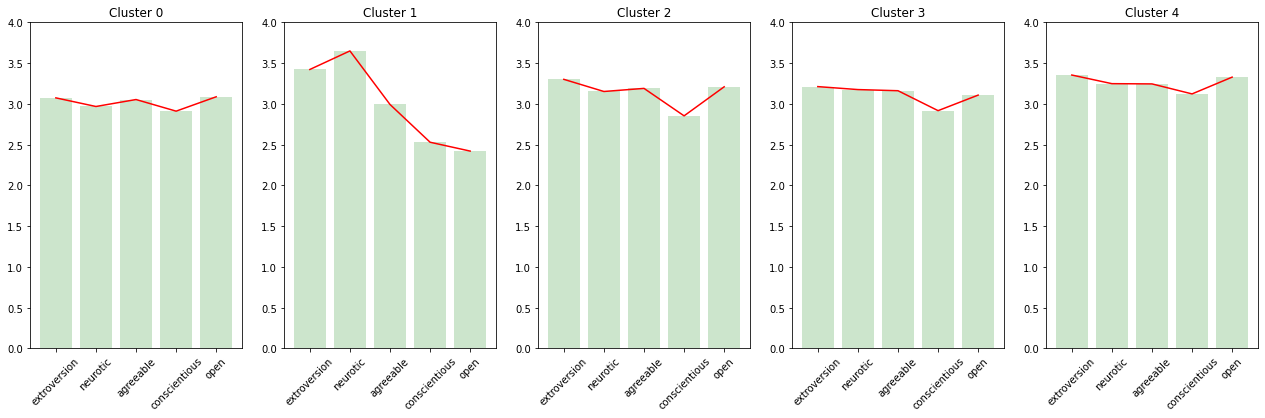

In [113]:
#visualizing some clusters
dataclusters = sum_data.groupby('clusters').mean()
plt.figure(figsize=(22,6))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

In [103]:
# using PCA to visualize in 2D graph
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(new_data)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-5.523571,-2.049606,4
1,-0.213351,2.983641,2
2,-0.917436,1.937220,2
3,0.768747,0.716650,3
4,-5.413889,1.958827,4


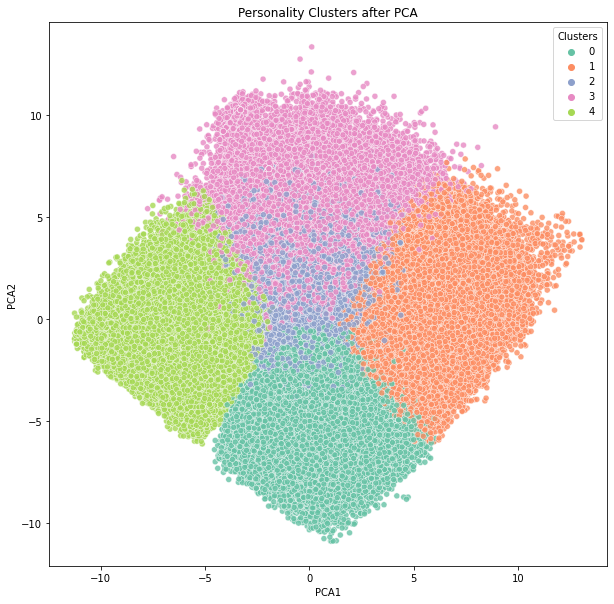

In [104]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

In [105]:
testing_data = pd.read_excel('/content/drive/MyDrive/testingFYP.xlsx')
testing_data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,2,3,3,2,2,5,2,4,5,4,2,3,4,5,2,2,1,1,3,1,2,5,1,5,2,5,1,3,5,5,5,1,4,1,4,1,5,2,5,5,3,2,4,2,5,1,5,2,5,5


In [106]:
print("supervised prediction is" ,clf.predict(testing_data))

supervised prediction is [2]


In [107]:
import pickle
import pandas as pd
testing_data = pd.read_excel('/content/drive/MyDrive/testingFYP.xlsx')

infile = open('/content/drive/MyDrive/trained_Model.pkl','rb')
new_dict = pickle.load(infile)
new_result = new_dict.predict(testing_data)
print(new_result)
infile.close()

[4]


In [108]:
print 

<function print>

In [109]:
my_personality = k_fit.predict(testing_data)
print('My personality cluster: ', my_personality)

My personality cluster:  [2]


**Sum of all row values.**

In [110]:
my_list = list(testing_data)
ext = my_list[1:10]
est = my_list[10:20]
agr = my_list[20:30]
csn = my_list[30:40]
opn = my_list[40:50]

sums = pd.DataFrame()
sums['extroversion'] = testing_data[ext].sum(axis=1)/10
sums['neurotic'] = testing_data[est].sum(axis=1)/10
sums['agreeable'] = testing_data[agr].sum(axis=1)/10
sums['conscientious'] = testing_data[csn].sum(axis=1)/10
sums['openness'] = testing_data[opn].sum(axis=1)/10
sums['Cluster'] = my_personality
print('Sum of Personality columns:')
sums


Sum of Personality columns:


,extroversion,neurotic,agreeable,conscientious,openness,Cluster
0,3.0,2.4,3.4,3.3,3.4,2


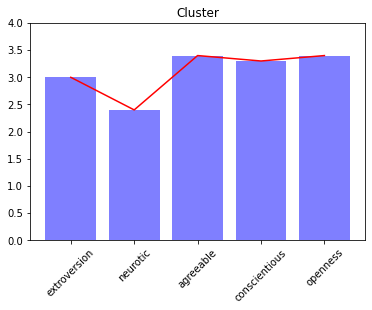

In [111]:
sum_new = sums.drop('Cluster', axis=1)
plt.bar(sum_new.columns, sum_new.iloc[0,:], color='blue', alpha=0.5)
plt.plot(sum_new.columns, sum_new.iloc[0,:], color='red')
plt.title('Cluster')
plt.xticks(rotation=45)
plt.ylim(0,4);